# Lecture 5 Coding Exercise: Machine Learning for Time Series Analysis 
### Supervised and Unsupervised Learning for Time Series Data

### **Learning Objectives**:
- Implement and experiment with supervised and unsupervised learning models for time series analysis.
- Use a multivariate time series dataset to explore supervised forecasting.
- Apply unsupervised learning techniques to detect anomalies in a time series context

## Section 1: Supervised Learning for Time Series Analysis
- for demonstration in this section, we will use the 'Global Economic Data' dataset to create features and implement regression models for forecasting GDP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.datasets import macrodata
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# surpress warnings
import warnings
warnings.filterwarnings("ignore")

### Load the Data 
- Load the dataset and perform basic preprocessing

In [2]:
data = macrodata.load_pandas().data
data['year'] = data['year'].astype(int)
data['quarter'] = data['quarter'].astype(int)
data['time'] = data['year'] + (data['quarter'] - 1) / 4
# Set time as the index set to datetime
data.index = pd.date_range('1959-03', periods=len(data), freq='Q')
# Drop the previos time columns, leave only the quarter as a seasonality feature
data = data.drop(columns=['year'])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Freq: QE-DEC
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quarter   203 non-null    int64  
 1   realgdp   203 non-null    float64
 2   realcons  203 non-null    float64
 3   realinv   203 non-null    float64
 4   realgovt  203 non-null    float64
 5   realdpi   203 non-null    float64
 6   cpi       203 non-null    float64
 7   m1        203 non-null    float64
 8   tbilrate  203 non-null    float64
 9   unemp     203 non-null    float64
 10  pop       203 non-null    float64
 11  infl      203 non-null    float64
 12  realint   203 non-null    float64
 13  time      203 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 23.8 KB


In [ ]:
#check for missing values
### YOUR CODE HERE

# handle missing values (if any)
### YOUR CODE HERE


In [4]:
# Define target variable ('GDP') and selected explanatory variables as potential predictors
df = data[['realgdp', 'realcons', 'realinv', 'unemp', 'infl', 'realdpi']]
df.rename(columns={'realgdp': 'GDP', 'realcons': 'Consumption', 'realinv': 'Investment', 'unemp': 'Unemployment', 'infl': 'Inflation', 'realdpi': 'Disposable_Income'}, inplace=True)
df.head()

,GDP,Consumption,Investment,Unemployment,Inflation,Disposable_Income
1959-03-31,2710.349,1707.4,286.898,5.8,0.00,1886.9
1959-06-30,2778.801,1733.7,310.859,5.1,2.34,1919.7
1959-09-30,2775.488,1751.8,289.226,5.3,2.74,1916.4
1959-12-31,2785.204,1753.7,299.356,5.6,0.27,1931.3
1960-03-31,2847.699,1770.5,331.722,5.2,2.31,1955.5


In [ ]:
# plot the individual time series
### YOUR CODE HERE

### Feature Engineering
- Create lagged features, rolling statistics, and external variable features to capture temporal patterns

In [6]:
# create lag features for target and exogenous variables, 1 quarter lag and 1 year lag
for lag in [# select lags]: 
    ### YOUR CODE HERE

df = df.dropna()


In [7]:
# Rolling mean and standard deviation features for target variable, 1 year window
df['GDP_rolling_mean'] = ### YOUR CODE HERE
df['GDP_rolling_std'] = ### YOUR CODE HERE

In [8]:
# Create Seasonality features
# make one-hot-encoding variables for seasonal variable (non-ordinal categorical variable), for example yearly quarters
df['Q1'] = ### YOUR CODE HERE
df['Q2'] = ### YOUR CODE HERE
df['Q3'] = ### YOUR CODE HERE
df['Q4'] = ### YOUR CODE HERE


In [ ]:
# Drop rows with missing values, and present the final dataset
df = ### YOUR CODE HERE
df.tail()

### Train Regression Models for One-Step Forecasting

#### Train Test Split

In [10]:
# Split into training and testing sets
# Remove the target variable to create the feature matrix
X = ### YOUR CODE HERE  
# Set target variable as a single column (for one step ahead forecasting)
y = ### YOUR CODE HERE 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False) # Shuffle=False to keep the time order

#### Train different regression models and evaluate their performance

In [11]:
# Function to plot the actual vs predicted values
def plot_results(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 4))
    #plt.plot(y_train.index, y_train, label='Actual')
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, y_pred, label='Predicted', color='red')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.legend()
    plt.show()

In [12]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=1000, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, random_state=42)
}

In [ ]:
# Run loop to fit the models and evaluate the performance
results = {}
for model_name, model in models.items():
    # Fit the model on the training data
    model.### YOUR CODE HERE 
    y_pred = ### YOUR CODE HERE # Predict results based on the x_test data
    rmse = ### YOUR CODE HERE 
    mape = ### YOUR CODE HERE 
    r2 = ### YOUR CODE HERE 
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R2 Score': r2}
    print(f"{model_name} - RMSE: {rmse:.2f}, MAPE: {mape:.2f}, R2 Score: {r2:.2f}")
    plot_results(y_test, y_pred, model_name)

#### Evaluate Over fitting
- Select a regression to model to train and predict future values
- Predict values based on the train set and compare prediction accuracy to the test set
- Try adjusting model prameters to effect overfiiting and generalize the model

In [63]:
model= ### YOUR CODE HERE 
model.### YOUR CODE HERE 
train_pred = ### YOUR CODE HERE  # Predict results based on the x_train data
test_pred = ### YOUR CODE HERE  # Predict results based on the x_test data
rmse_train = mean_squared_error(y_train, train_pred, squared=False)
rmse_test = mean_squared_error(y_test, test_pred, squared=False)

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(y_train.index, y_train, label='Actual Train', color='blue')
plt.plot(y_train.index, train_pred, label='Predicted Train', color='red')
plt.plot(y_test.index, y_test, label='Actual Test', color='orange')
plt.plot(y_test.index, y_pred, label='Predicted Test', color='green')
plt.title(f' Actual vs Predicted')
plt.legend()
plt.show()

print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")  

### Multi-Step Forecasting with Multiple Output Strategy
- Prepare input data set structure for multi-step forecasting:
    - The y_train data structure should include future time steps as columns 
- Train a regression model for multi-step forecasting to predict multiple future values of target variable


#### Create a train test split- based on defined number of time steps

In [16]:
# function split the data into train and test sets chronologically- define test steps number that will be used for the multiple output forecasting
future_steps = 10
def split_train_test_steps(df, test_split_size= future_steps):
    train, test = df[:-test_split_size], df[-test_split_size:]
    return train, test

In [17]:
train_multi, test_multi = split_train_test_steps(df, test_split_size= 10)
print('train_multi shape:', train_multi.shape)
print('test_multi shape:', test_multi.shape)

train_multi shape: (186, 18)
test_multi shape: (10, 18)


In [18]:
# Define taget and features for multi-step forecasting
X_train = train_multi.drop(columns=['GDP'])  # Remove the target variable to create the feature matrix
y_train = train_multi['GDP'] # Set target variable as a single column (for one step ahead forecasting)
X_test = test_multi.drop(columns=['GDP'])  # Remove the target variable to create the feature matrix
y_test = test_multi['GDP'] # Set target variable as a single column (for one step ahead forecasting)

#### Prepare the train y matrix
- appent dfined number of future time steps (future lags) to each row. 
- The addapted y_train matrix will serve as target for the model
- make sure to drop rows with NaNs and adjust the X matrix shape

In [19]:
# for the y set, cretae a loop to shift the target variable by the number of steps (y as data series)
def create_multi_step_target(y, steps_ahead= future_steps-1):
    df = pd.DataFrame(y)
    var_name = ### YOUR CODE HERE 

    for i in range(1, steps_ahead+1):
        df[f'{var_name}_t+{i}'] = ### YOUR CODE HERE 
    return df

In [ ]:
y_train_multi = create_multi_step_target(y_train, steps_ahead= 9)
y_train_multi

In [ ]:
# Drop rows with missing values
y_train_multi = ### YOUR CODE HERE 

# match the index of the X_train and y_train_multi (both should have the same length and index)
X_train_multi = ### YOUR CODE HERE 

print('X_train_multi shape:', X_train_multi.shape)
print('y_train_multi shape:', y_train_multi.shape)

#### Train regression model to predict multiple time steps
- fit the model on the addapted y matrix
- predict multiple vaules based on the first row of the test set
- Evaluate results

##### Random Forest

In [ ]:
# Train regression model for multi-step forecasting
model_multi = RandomForestRegressor(n_estimators=1000, random_state=42)
model_multi.fit(X_train_multi, y_train_multi)


###### Predict the future values based on the first row of the test set

In [ ]:
# Predict the future values based on the first row of the test set

# isolate first row of the test set
X_test_first_row = ### YOUR CODE HERE 

# predict the future values based on the first row of the test set
y_pred_multi = ### YOUR CODE HERE 

# creat df of the predicted values with index of y_test
y_pred_multi_df = pd.DataFrame(y_pred_multi[0], index= y_test.index)
y_pred_multi_df


In [ ]:
# plot compare the predicted values with the actual values
plt.figure(figsize=(8, 4))
plt.plot(y_train.index, y_train, label='Actual')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_multi[0], label='Predicted Multi-step', color='green')
plt.title('Multi-step Forecasting - Actual vs Predicted')
plt.legend()
plt.show()

# Evaluate the model
rmse_multi = mean_squared_error(y_test, y_pred_multi[0], squared=False)
print(f"Multi-step Forecasting RMSE: {rmse_multi:.2f}")

##### Linear Regression

In [ ]:
# Train linear regression model (Linear or Ridge or Lasso) for multi-step forecasting
model_multi = ### YOUR CODE HERE
model_multi.fit(X_train_multi, y_train_multi)


In [ ]:
# isolate first row of the test set
X_test_multi = ### YOUR CODE HERE 

# predict the future values based on the first row of the test set
y_pred_multi = ### YOUR CODE HERE 

# plot compare the predicted values with the actual values
plt.figure(figsize=(8, 4))
plt.plot(y_train.index, y_train, label='Actual')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_multi[0], label='Predicted Multi-step', color='green')
plt.title('Multi-step Forecasting - Actual vs Predicted')
plt.legend()
plt.show()

# Evaluate the model
rmse_multi = mean_squared_error(y_test, y_pred_multi[0], squared=False)
print(f"Multi-step Forecasting RMSE: {rmse_multi:.2f}")


## Section 2: Unsupervised Learning for Anomaly Detection
- In this section, you can use the catfish sales dataset to detect anomalies using different unsupervised learning models.

### Load Data
- Load the dataset and visualize the time series to understand its structure.

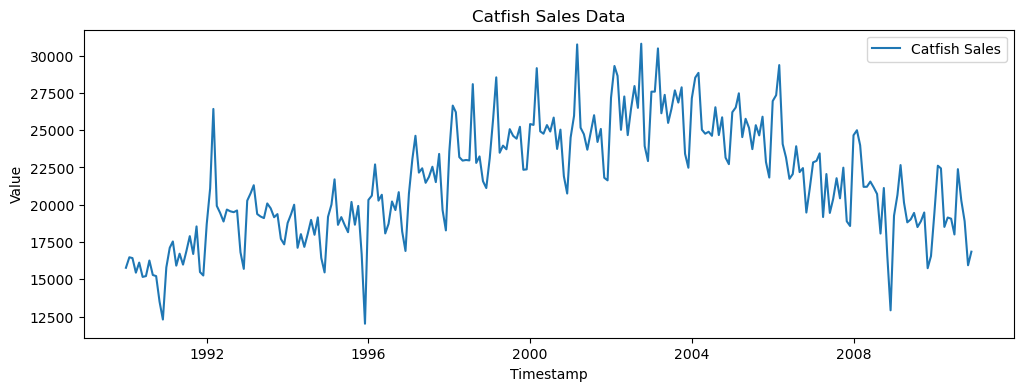

In [27]:
# Load the catfish_outliers.csv data set from local directory
anomaly_df = pd.read_csv('./catfish_outliers.csv')
anomaly_df['Date'] = pd.to_datetime(anomaly_df['Date'])
anomaly_df.set_index('Date', inplace=True)
anomaly_df.columns = ['Sales']
# leave center partof the data (from 1990 to 2010)
anomaly_df = anomaly_df['1990':'2010']


# Plot the data to understand its structure
plt.figure(figsize=(12, 4))
plt.plot(anomaly_df.index, anomaly_df['Sales'], label='Catfish Sales')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Catfish Sales Data')
plt.legend()
plt.show()

### Standardize the Data
- Scale the data to make it suitable for anomaly detection models.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
scaler = ### YOUR CODE HERE 
anomaly_df['value_scaled'] = ### YOUR CODE HERE 

### Implement Anomaly Detection Models
- Implement different models such as KNN, LOF, Isolation Forest, and OCSVM to detect anomalies in the dataset
- Visualy inspect the detected outliers for each model- Evaluate the efficiancy
- Adjust models parmeters and contamination ratio to inspect the effect on the outcome

In [29]:
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.copod import COPOD

In [30]:
# initiate a number of anomaly detection models
contamination = 0.05

anomaly_models = {
    'KNN': KNN(n_neighbors=5, contamination=contamination),
    'LOF': LOF(n_neighbors=15, contamination=contamination),
    'Isolation Forest': IForest(n_estimators=50, contamination=contamination, random_state=42),
    'OCSVM': OCSVM(kernel='rbf', contamination=contamination),
    'COPOD': COPOD(contamination=contamination)
}

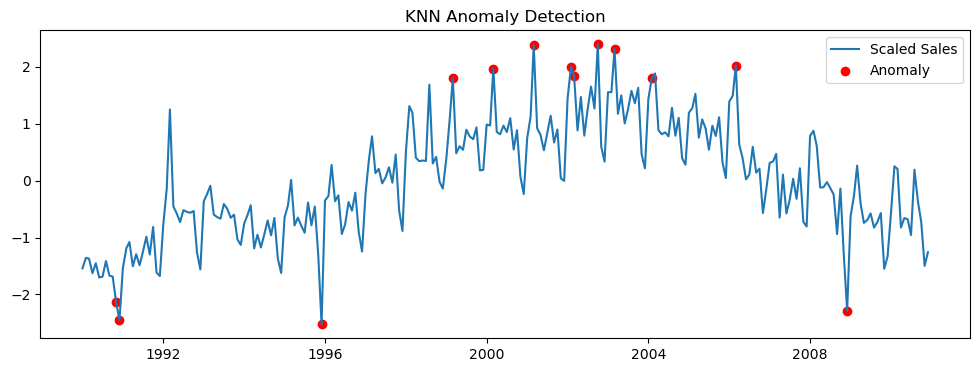

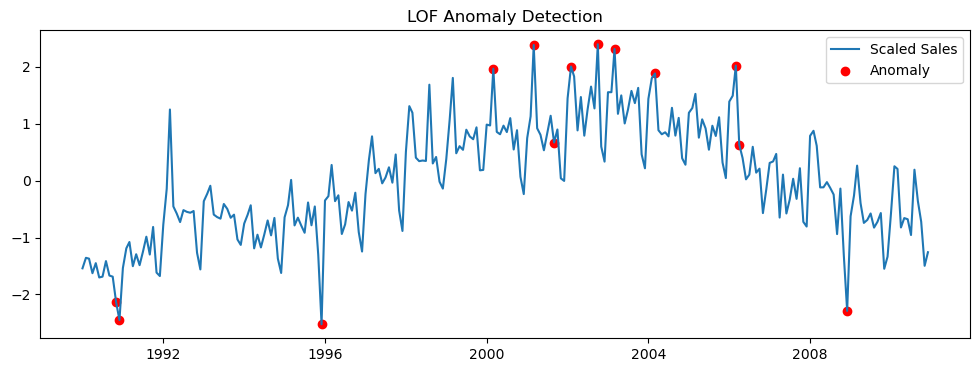

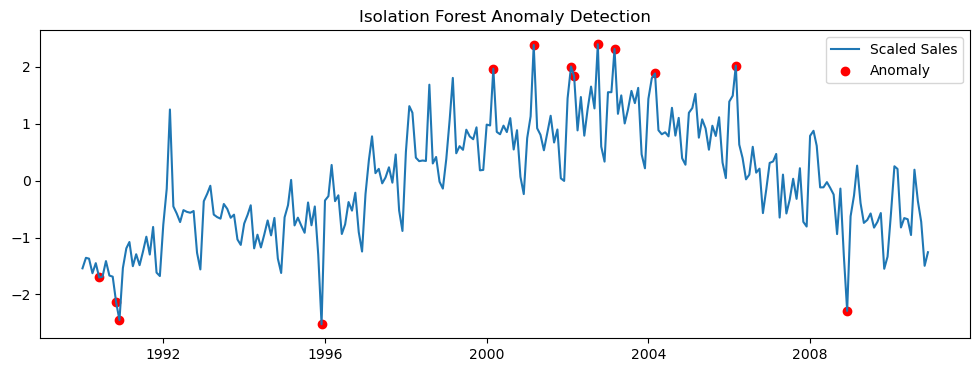

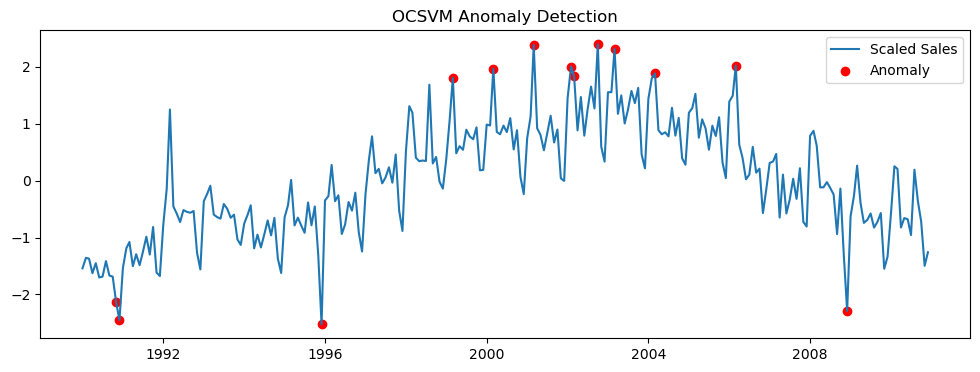

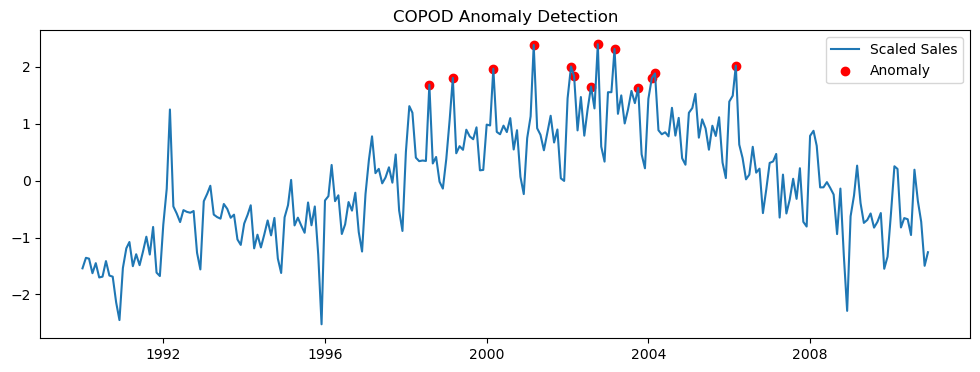

In [31]:
# run for loop to fit each model and plot the results on top of the original data
for model_name, model in anomaly_models.items():
    model.fit(### YOUR CODE HERE )
    anomaly_df[model_name] = ### YOUR CODE HERE 

    plt.figure(figsize=(12, 4))
    plt.plot(anomaly_df.index, anomaly_df['value_scaled'], label='Scaled Sales')
    plt.scatter(anomaly_df[anomaly_df[model_name] == 1].index, anomaly_df[anomaly_df[model_name] == 1]['value_scaled'], color='red', label='Anomaly')
    plt.title(f'{model_name} Anomaly Detection')
    plt.legend()
    plt.show()
   

# Lecture 5 Coding Exercise: Machine Learning for Time Series Analysis- Example Solution
### Supervised and Unsupervised Learning for Time Series Data

### **Learning Objectives**:
- Implement and experiment with supervised and unsupervised learning models for time series analysis.
- Use a multivariate time series dataset to explore supervised forecasting.
- Apply unsupervised learning techniques to detect anomalies in a time series context

## Section 1: Supervised Learning for Time Series Analysis
- for demonstration in this section, we will use the 'Global Economic Data' dataset to create features and implement regression models for forecasting GDP

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.datasets import macrodata
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# surpress warnings
import warnings
warnings.filterwarnings("ignore")

### Load the Data 
- Load the dataset and perform basic preprocessing

In [33]:
data = macrodata.load_pandas().data
data['year'] = data['year'].astype(int)
data['quarter'] = data['quarter'].astype(int)
data['time'] = data['year'] + (data['quarter'] - 1) / 4
# Set time as the index set to datetime
data.index = pd.date_range('1959-03', periods=len(data), freq='Q')
# Drop the previos time columns, leave only the quarter as a seasonality feature
data = data.drop(columns=['year'])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Freq: QE-DEC
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quarter   203 non-null    int64  
 1   realgdp   203 non-null    float64
 2   realcons  203 non-null    float64
 3   realinv   203 non-null    float64
 4   realgovt  203 non-null    float64
 5   realdpi   203 non-null    float64
 6   cpi       203 non-null    float64
 7   m1        203 non-null    float64
 8   tbilrate  203 non-null    float64
 9   unemp     203 non-null    float64
 10  pop       203 non-null    float64
 11  infl      203 non-null    float64
 12  realint   203 non-null    float64
 13  time      203 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 23.8 KB


In [34]:
#check for missing values
data.isnull().sum()

quarter     0
realgdp     0
realcons    0
realinv     0
realgovt    0
realdpi     0
cpi         0
m1          0
tbilrate    0
unemp       0
pop         0
infl        0
realint     0
time        0
dtype: int64

In [35]:
# Define target variable ('GDP') and selected explanatory variables as potential predictors
df = data[['realgdp', 'realcons', 'realinv', 'unemp', 'infl', 'realdpi']]
df.rename(columns={'realgdp': 'GDP', 'realcons': 'Consumption', 'realinv': 'Investment', 'unemp': 'Unemployment', 'infl': 'Inflation', 'realdpi': 'Disposable_Income'}, inplace=True)
df.head()

,GDP,Consumption,Investment,Unemployment,Inflation,Disposable_Income
1959-03-31,2710.349,1707.4,286.898,5.8,0.00,1886.9
1959-06-30,2778.801,1733.7,310.859,5.1,2.34,1919.7
1959-09-30,2775.488,1751.8,289.226,5.3,2.74,1916.4
1959-12-31,2785.204,1753.7,299.356,5.6,0.27,1931.3
1960-03-31,2847.699,1770.5,331.722,5.2,2.31,1955.5


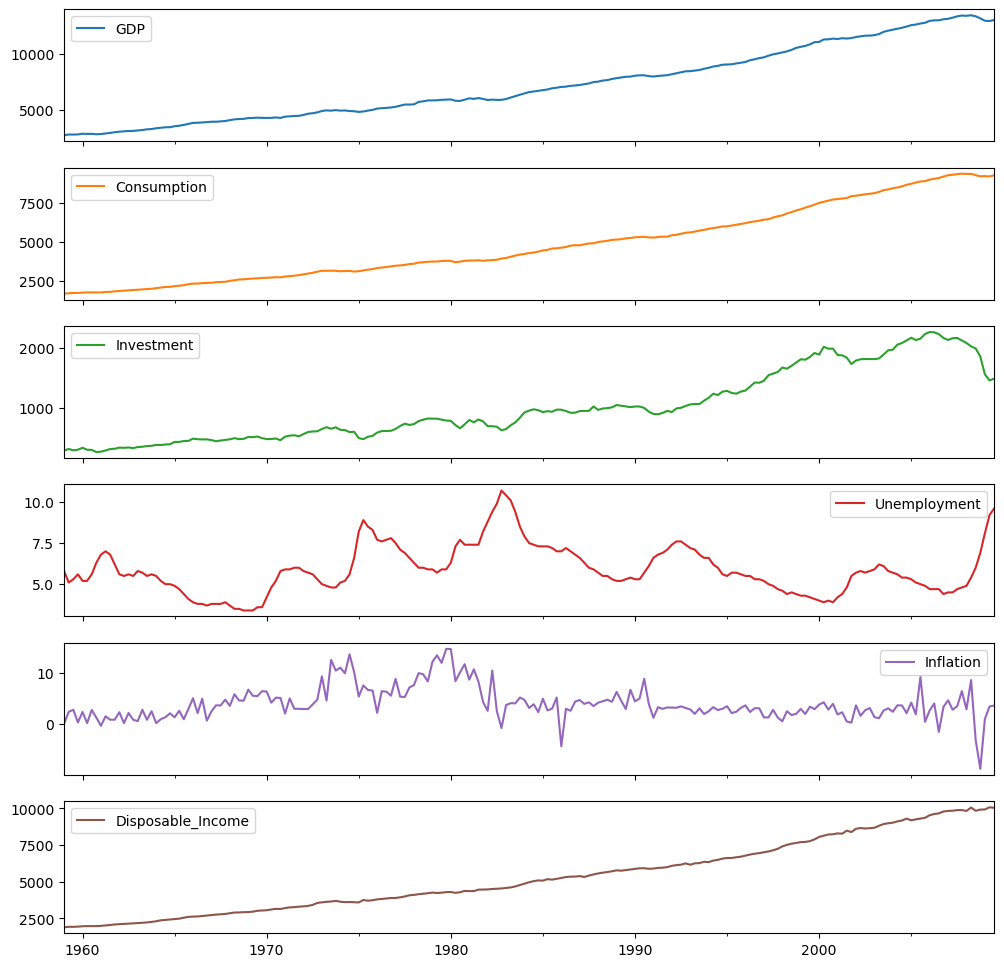

In [36]:
# plot the individual time series
df.plot(subplots=True, figsize=(12, 12))
plt.show()

### Feature Engineering
- Create lagged features, rolling statistics, and external variable features to capture temporal patterns

In [37]:
# create lag features for target and exogenous variables, 1 quarter lag and 1 year lag
for lag in [1, 4]: 
    df[f'GDP_lag_{lag}'] = df['GDP'].shift(lag)
    df[f'Consumption_lag_{lag}'] = df['Consumption'].shift(lag)
    df[f'Investment_lag_{lag}'] = df['Investment'].shift(lag)

df = df.dropna()


In [38]:
# Rolling mean and standard deviation features for target variable, 1 year window
df['GDP_rolling_mean'] = df['GDP'].rolling(window=4).mean()
df['GDP_rolling_std'] = df['GDP'].rolling(window=4).std()

In [39]:
# Create Seasonality features
# make dummy variables for quarter (instead of ordinal encoding)
df['Q1'] = np.where(df.index.quarter == 1, 1, 0)
df['Q2'] = np.where(df.index.quarter == 2, 1, 0)
df['Q3'] = np.where(df.index.quarter == 3, 1, 0)
df['Q4'] = np.where(df.index.quarter == 4, 1, 0)


In [40]:
# Drop rows with missing values, and present the final dataset
df = df.dropna()
df.tail()

,GDP,Consumption,Investment,Unemployment,Inflation,Disposable_Income,GDP_lag_1,Consumption_lag_1,Investment_lag_1,GDP_lag_4,Consumption_lag_4,Investment_lag_4,GDP_rolling_mean,GDP_rolling_std,Q1,Q2,Q3,Q4
2008-09-30,13324.600,9267.7,1990.693,6.0,-3.16,9838.3,13415.266,9351.0,2026.518,13321.109,9335.6,2166.491,13374.49500,38.689787,0,0,1,0
2008-12-31,13141.920,9195.3,1857.661,6.9,-8.79,9920.4,13324.600,9267.7,1990.693,13391.249,9363.6,2123.426,13312.16275,119.387179,0,0,0,1
2009-03-31,12925.410,9209.2,1558.494,8.1,0.94,9926.4,13141.920,9195.3,1857.661,13366.865,9349.6,2082.886,13201.79900,216.506058,1,0,0,0
2009-06-30,12901.504,9189.0,1456.678,9.2,3.37,10077.5,12925.410,9209.2,1558.494,13415.266,9351.0,2026.518,13073.35850,199.370424,0,1,0,0
2009-09-30,12990.341,9256.0,1486.398,9.6,3.56,10040.6,12901.504,9189.0,1456.678,13324.600,9267.7,1990.693,12989.79375,108.140407,0,0,1,0


### Train Regression Models for One-Step Forecasting

#### Train Test Split

In [41]:
# Split into training and testing sets
X = df.drop(columns=['GDP'])  # Remove the target variable to create the feature matrix
y = df['GDP'] # Set target variable as a single column (for one step ahead forecasting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False) # Shuffle=False to keep the time order

#### Train different regression models and evaluate their performance

In [42]:
# Function to plot the actual vs predicted values
def plot_results(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 4))
    #plt.plot(y_train.index, y_train, label='Actual')
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, y_pred, label='Predicted', color='red')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.legend()
    plt.show()

In [43]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=1000, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, random_state=42)
}

Linear Regression - RMSE: 53.62, MAPE: 0.00, R2 Score: 1.00


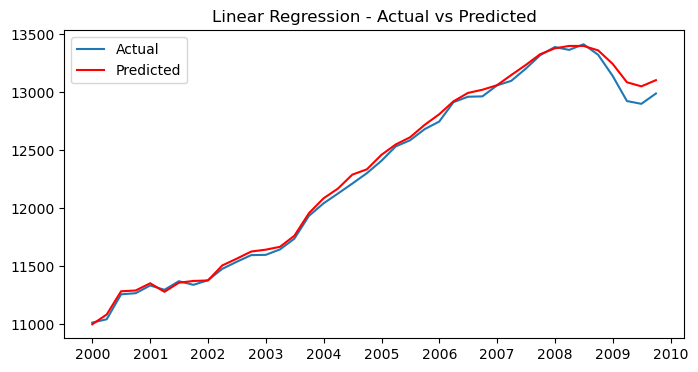

Ridge - RMSE: 53.45, MAPE: 0.00, R2 Score: 1.00


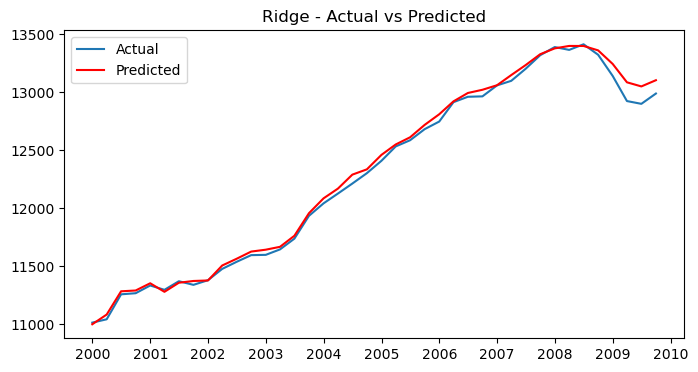

Lasso - RMSE: 128.02, MAPE: 0.01, R2 Score: 0.97


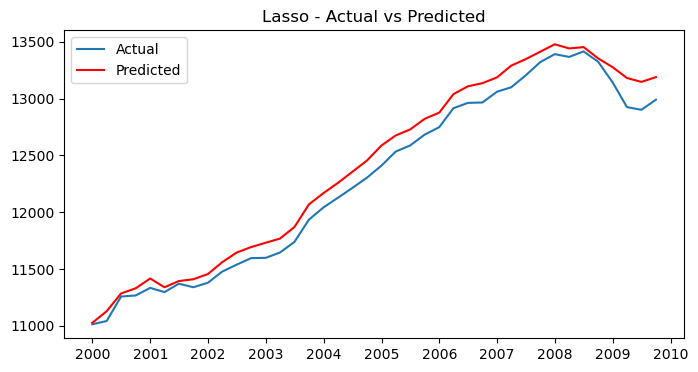

Random Forest - RMSE: 1958.96, MAPE: 0.14, R2 Score: -5.25


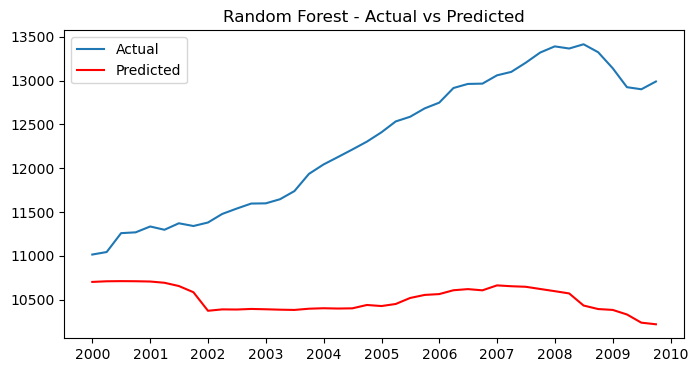

Gradient Boosting - RMSE: 1922.57, MAPE: 0.14, R2 Score: -5.02


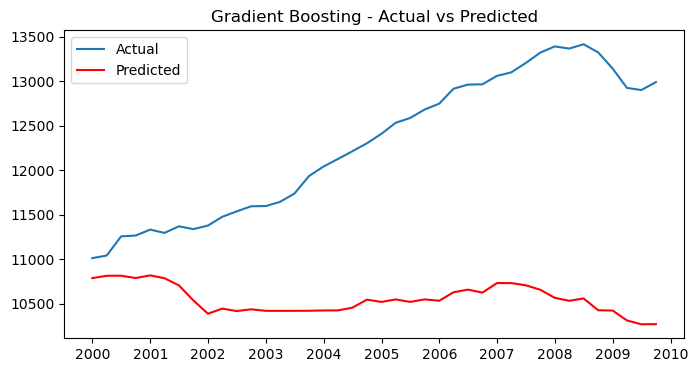

In [44]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R2 Score': r2}
    print(f"{model_name} - RMSE: {rmse:.2f}, MAPE: {mape:.2f}, R2 Score: {r2:.2f}")
    plot_results(y_test, y_pred, model_name)

#### Evaluate Over fitting
- Predict values based on the train set and compare prediction accuracy to the test set
- Try adjusting model prameters to effect overfiiting and generalize the model

In [45]:
model= RandomForestRegressor(max_depth=5, n_estimators=100, max_features=5, random_state=42)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
rmse_train = mean_squared_error(y_train, train_pred, squared=False)
rmse_test = mean_squared_error(y_test, test_pred, squared=False)

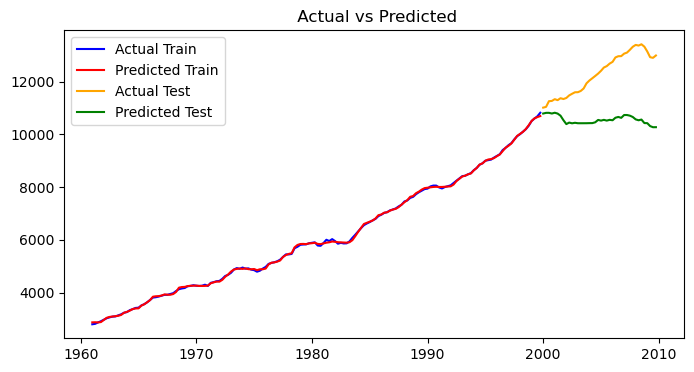

Train RMSE: 32.65, Test RMSE: 1887.77


In [46]:
plt.figure(figsize=(8, 4))
plt.plot(y_train.index, y_train, label='Actual Train', color='blue')
plt.plot(y_train.index, train_pred, label='Predicted Train', color='red')
plt.plot(y_test.index, y_test, label='Actual Test', color='orange')
plt.plot(y_test.index, y_pred, label='Predicted Test', color='green')
plt.title(f' Actual vs Predicted')
plt.legend()
plt.show()

print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")  

### Multi-Step Forecasting with Multiple Output Strategy
- Prepare input data set structure for multi-step forecasting
- Train a Random Forest model for multi-step forecasting to predict multiple future values of target variable


#### Create a train test split- based on defined number of time steps

In [47]:
# function split the data into train and test sets chronologically- define test steps number
def split_train_test_steps(df, test_split_size):
    train, test = df[:-test_split_size], df[-test_split_size:]
    return train, test

In [48]:
future_steps= 10
train_multi, test_multi = split_train_test_steps(df, test_split_size= future_steps)
print('train_multi shape:', train_multi.shape)
print('test_multi shape:', test_multi.shape)

train_multi shape: (186, 18)
test_multi shape: (10, 18)


In [49]:
# Define taget and features for multi-step forecasting
X_train = train_multi.drop(columns=['GDP'])  # Remove the target variable to create the feature matrix
y_train = train_multi['GDP'] # Set target variable as a single column (for one step ahead forecasting)
X_test = test_multi.drop(columns=['GDP'])  # Remove the target variable to create the feature matrix
y_test = test_multi['GDP'] # Set target variable as a single column (for one step ahead forecasting)

#### Prepare the train y matrix
- appent dfined number of future time steps (future lags) to each row. 
- The addapted y_train matrix will serve as target for the model
- make sure to drop rows with NaNs and adjust the X matrix shape

In [50]:
# for the y set, cretae a loop to shift the target variable by the number of steps (y as data series)
def create_multi_step_target(y, steps_ahead= future_steps-1):
    df = pd.DataFrame(y)
    var_name = df.columns[0]

    for i in range(1, steps_ahead+1):
        df[f'{var_name}_t+{i}'] = df[var_name].shift(-i)
    return df

In [51]:
y_train_multi = create_multi_step_target(y_train, steps_ahead= 9)
y_train_multi

,GDP,GDP_t+1,GDP_t+2,GDP_t+3,GDP_t+4,GDP_t+5,GDP_t+6,GDP_t+7,GDP_t+8,GDP_t+9
1960-12-31,2802.616,2819.264,2872.005,2918.419,2977.830,3031.241,3064.709,3093.047,3100.563,3141.087
1961-03-31,2819.264,2872.005,2918.419,2977.830,3031.241,3064.709,3093.047,3100.563,3141.087,3180.447
1961-06-30,2872.005,2918.419,2977.830,3031.241,3064.709,3093.047,3100.563,3141.087,3180.447,3240.332
1961-09-30,2918.419,2977.830,3031.241,3064.709,3093.047,3100.563,3141.087,3180.447,3240.332,3264.967
1961-12-31,2977.830,3031.241,3064.709,3093.047,3100.563,3141.087,3180.447,3240.332,3264.967,3338.246
...,...,...,...,...,...,...,...,...,...,...
2006-03-31,12915.938,12962.462,12965.916,13060.679,13099.901,NaN,NaN,NaN,NaN,NaN
2006-06-30,12962.462,12965.916,13060.679,13099.901,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-30,12965.916,13060.679,13099.901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,13060.679,13099.901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Drop rows with missing values
y_train_multi = y_train_multi.dropna()

# match the index of the X_train and y_train_multi
X_train_multi = X_train.loc[y_train_multi.index]

print('X_train_multi shape:', X_train_multi.shape)
print('y_train_multi shape:', y_train_multi.shape)

X_train_multi shape: (177, 17)
y_train_multi shape: (177, 10)


#### Train regression model to predict multiple time steps
- fit the model on the addapted y matrix
- predict multiple vaules based on the first row of the test set
- Evaluate results

##### Random Forest

In [53]:
# Train regression model for multi-step forecasting
model_multi = RandomForestRegressor(n_estimators=1000, random_state=42)
model_multi.fit(X_train_multi, y_train_multi)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [54]:
# isolate first row of the test set
X_test_multi = X_test.iloc[:1]

# predict the future values based on the first row of the test set
y_pred_multi = model_multi.predict(X_test_multi)

# creat df of the predicted values with index of y_test
y_pred_multi_df = pd.DataFrame(y_pred_multi[0], index= y_test.index)
y_pred_multi_df


,0
2007-06-30,12211.561181
2007-09-30,12316.321320
2007-12-31,12394.421685
2008-03-31,12482.659231
2008-06-30,12556.206205
2008-09-30,12675.277400
2008-12-31,12752.842390
2009-03-31,12800.877319
2009-06-30,12872.233579
2009-09-30,12927.547513


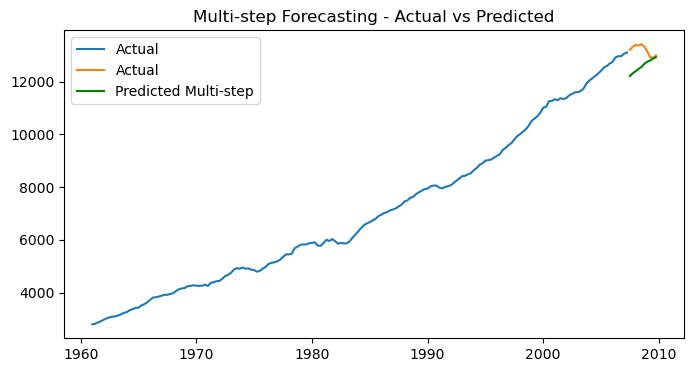

Multi-step Forecasting RMSE: 714.23


In [55]:
# plot compare the predicted values with the actual values
plt.figure(figsize=(8, 4))
plt.plot(y_train.index, y_train, label='Actual')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_multi[0], label='Predicted Multi-step', color='green')
plt.title('Multi-step Forecasting - Actual vs Predicted')
plt.legend()
plt.show()

# Evaluate the model
rmse_multi = mean_squared_error(y_test, y_pred_multi[0], squared=False)
print(f"Multi-step Forecasting RMSE: {rmse_multi:.2f}")




##### Linear Regression

In [56]:
# Train linear regression model for multi-step forecasting
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)


LinearRegression()

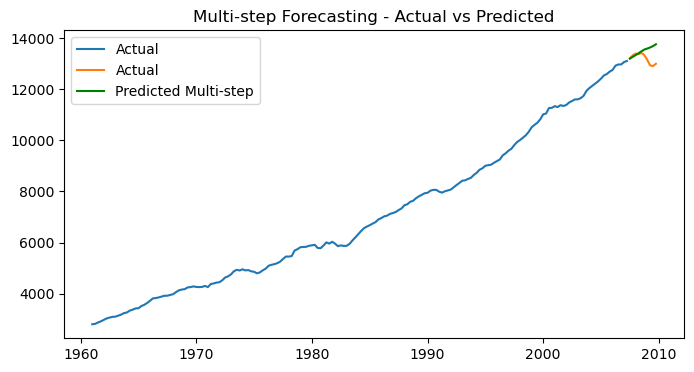

Multi-step Forecasting RMSE: 441.13


In [57]:
# isolate first row of the test set
X_test_multi = X_test.iloc[:1]

# predict the future values based on the first row of the test set
y_pred_multi = model_multi.predict(X_test_multi)

# plot compare the predicted values with the actual values
plt.figure(figsize=(8, 4))
plt.plot(y_train.index, y_train, label='Actual')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_multi[0], label='Predicted Multi-step', color='green')
plt.title('Multi-step Forecasting - Actual vs Predicted')
plt.legend()
plt.show()

# Evaluate the model
rmse_multi = mean_squared_error(y_test, y_pred_multi[0], squared=False)
print(f"Multi-step Forecasting RMSE: {rmse_multi:.2f}")


## Section 2: Unsupervised Learning for Anomaly Detection
- In this section, you will use the catfish sales dataset to detect anomalies using different unsupervised learning models.

### Load Data
- Load the dataset and visualize the time series to understand its structure.

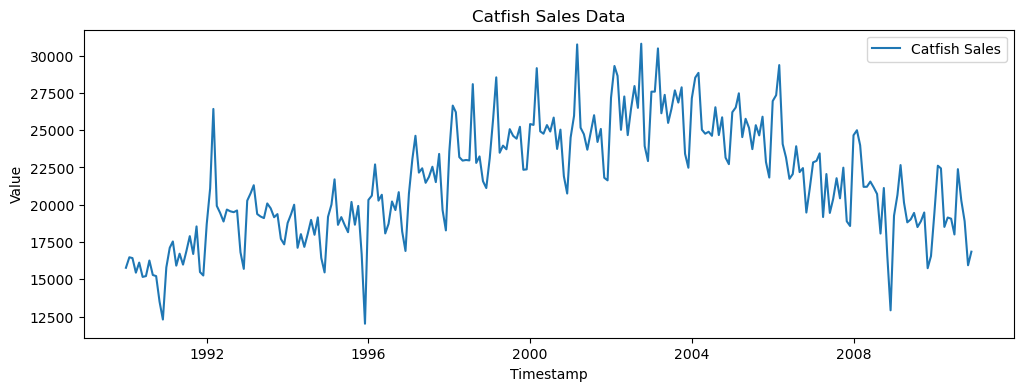

In [65]:
# Load the catfish_outliers.csv data set from local directory
anomaly_df = pd.read_csv('Data_sets/catfish_outliers.csv')
anomaly_df['Date'] = pd.to_datetime(anomaly_df['Date'])
anomaly_df.set_index('Date', inplace=True)
anomaly_df.columns = ['Sales']
# leave center partof the data (from 1990 to 2010)
anomaly_df = anomaly_df['1990':'2010']


# Plot the data to understand its structure
plt.figure(figsize=(12, 4))
plt.plot(anomaly_df.index, anomaly_df['Sales'], label='Catfish Sales')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Catfish Sales Data')
plt.legend()
plt.show()

### Standardize the Data
- Scale the data to make it suitable for anomaly detection models.

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [67]:
scaler = StandardScaler()
anomaly_df['value_scaled'] = scaler.fit_transform(anomaly_df[['Sales']])

### Implement Anomaly Detection Models
- Implement different models such as KNN, LOF, Isolation Forest, and OCSVM to detect anomalies in the dataset
- Visualy inspect the detected outliers for each model- Evaluate the efficiancy
- Adjust models parmeters and contamination ratio to inspect the effect on the outcome

In [68]:
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.copod import COPOD

In [69]:
# initiate a number of anomaly detection models
contamination = 0.05

anomaly_models = {
    'KNN': KNN(n_neighbors=5, contamination=contamination),
    'LOF': LOF(n_neighbors=15, contamination=contamination),
    'Isolation Forest': IForest(n_estimators=50, contamination=contamination, random_state=42),
    'OCSVM': OCSVM(kernel='rbf', contamination=contamination),
    'COPOD': COPOD(contamination=contamination)
}

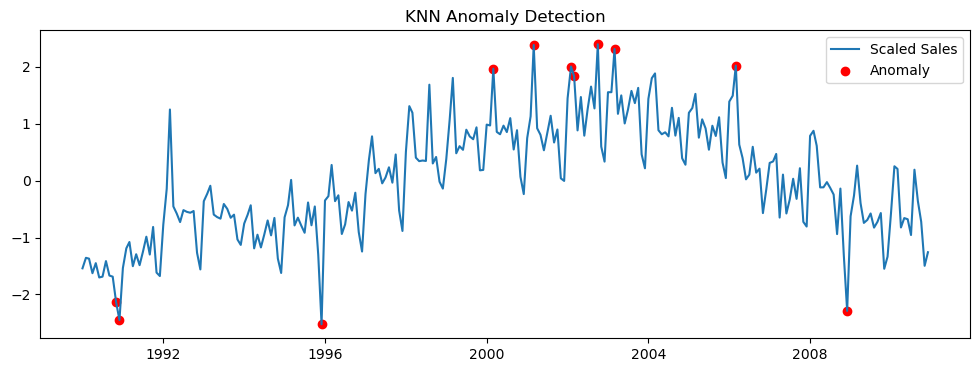

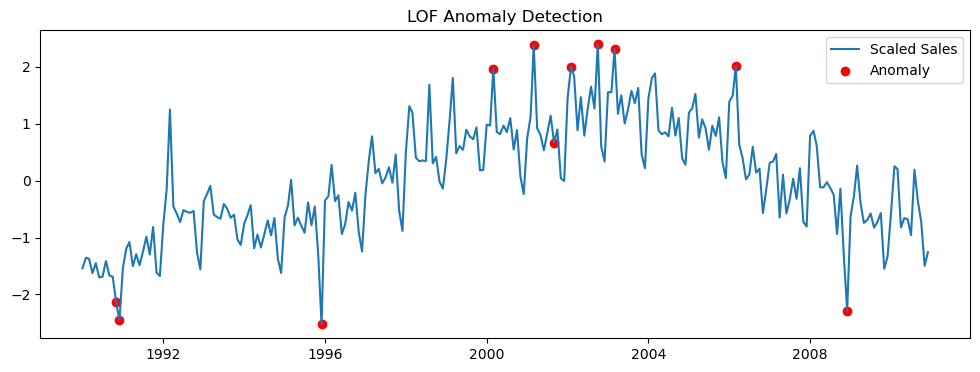

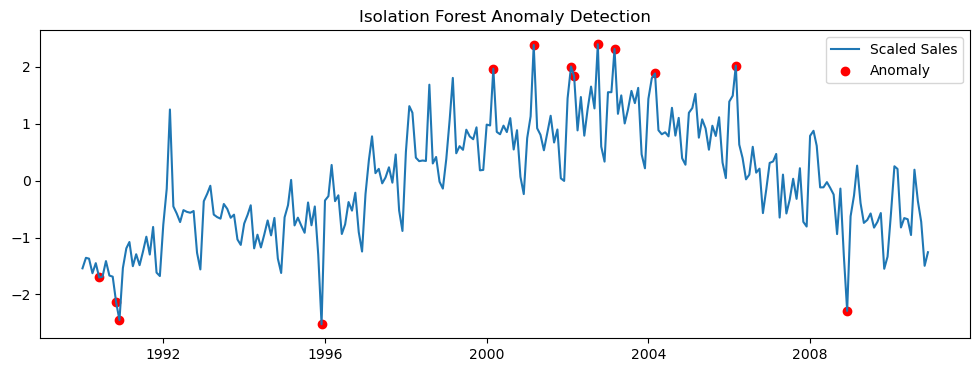

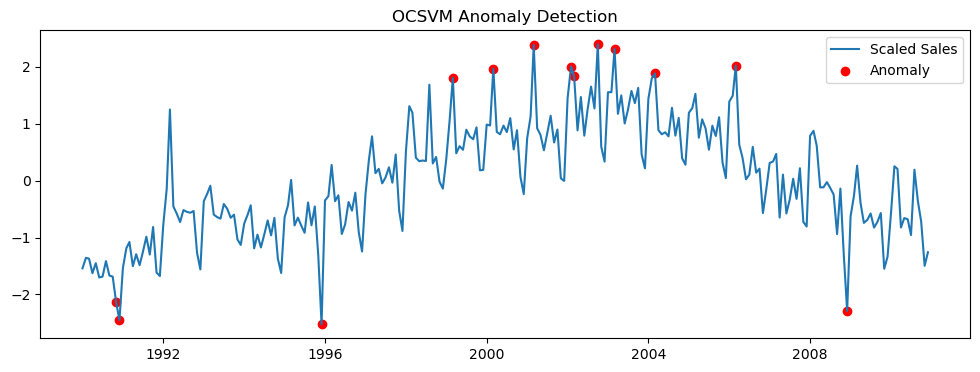

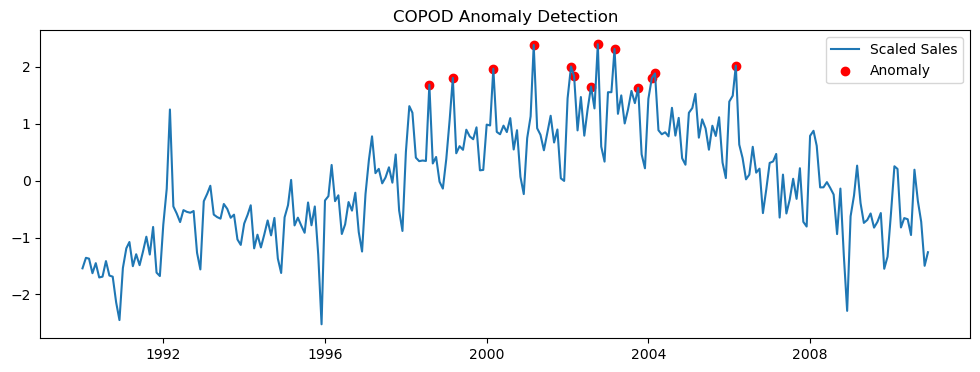

In [70]:
# run for loop to fit each model and plot the results on top of the original data
for model_name, model in anomaly_models.items():
    model.fit(anomaly_df[['value_scaled']])
    anomaly_df[model_name] = model.predict(anomaly_df[['value_scaled']])

    plt.figure(figsize=(12, 4))
    plt.plot(anomaly_df.index, anomaly_df['value_scaled'], label='Scaled Sales')
    plt.scatter(anomaly_df[anomaly_df[model_name] == 1].index, anomaly_df[anomaly_df[model_name] == 1]['value_scaled'], color='red', label='Anomaly')
    plt.title(f'{model_name} Anomaly Detection')
    plt.legend()
    plt.show()
   